In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline

In [5]:
daily = pd.read_csv('daily_sales.csv')
daily.head()

,Unnamed: 0,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,9924,35967,13955,11734,35689,13499,11232
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,9028,36398,15089,8005,37178,14256,9152
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,8105,34864,13919,7011,35855,15557,8406
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,9879,36661,15132,8874,36837,15420,8607


In [4]:
monthly = pd.read_csv('monthly_sales.csv')
monthly.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695


In [6]:
monthly['Month, Year'] = monthly['Month, Year'].apply(lambda x: datetime.strptime(x, '%b-%d').replace(year = 2019))

In [7]:
monthly['Month, Year'] = monthly.apply(lambda row: row['Month, Year'].replace(year = 2016 + int(row.name) // 12), axis = 1)

In [8]:
monthlyHM = [c for c in monthly.columns if 'HM' in c]
monthlyCF = [c for c in monthly.columns if 'CF' in c]
monthlyFF = [c for c in monthly.columns if 'FF' in c]

In [9]:
monthlyC = [c for c in monthly.columns if '-C' in c]
monthlyNE = [c for c in monthly.columns if '-NE' in c]
monthlyNW = [c for c in monthly.columns if '-NW' in c]
monthlySE = [c for c in monthly.columns if '-SE' in c]
monthlySW = [c for c in monthly.columns if '-SW' in c]

monthly['C_total'] = monthly[monthlyC].sum(axis = 1)
monthly['NE_total'] = monthly[monthlyNE].sum(axis = 1)
monthly['NW_total'] = monthly[monthlyNW].sum(axis = 1)
monthly['SE_total'] = monthly[monthlySE].sum(axis = 1)
monthly['SW_total'] = monthly[monthlySW].sum(axis = 1)
monthly.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,...,CF-SE,FF-SE,HM-C,CF-C,FF-C,C_total,NE_total,NW_total,SE_total,SW_total
0,2016-01-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,...,456264,273758,1126476,450958,281619,1859053,1920995,1871601,1825056,1874274
1,2016-02-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,...,486254,280311,1109076,462115,288586,1859777,1959215,1960649,1933574,1969544
2,2016-03-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,...,472458,295045,1167894,486622,280523,1935039,2027678,1939014,1901402,2022124
3,2016-04-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,...,491684,283441,1116560,465233,290533,1872326,1997833,1946570,1908892,1990964
4,2016-05-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,...,506283,291857,1155612,481505,300695,1937812,2108274,1979297,2013220,2082809


In [10]:
monthly['HM_total'] = monthly[monthlyHM].sum(axis = 1)
monthly['CF_total'] = monthly[monthlyCF].sum(axis = 1)
monthly['FF_total'] = monthly[monthlyFF].sum(axis = 1)
monthly['total'] = monthly['HM_total'] + monthly['CF_total'] + monthly['FF_total']

monthly.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,...,FF-C,C_total,NE_total,NW_total,SE_total,SW_total,HM_total,CF_total,FF_total,total
0,2016-01-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,...,281619,1859053,1920995,1871601,1825056,1874274,5598648,2352671,1399660,9350979
1,2016-02-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,...,288586,1859777,1959215,1960649,1933574,1969544,5840210,2394392,1448157,9682759
2,2016-03-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,...,280523,1935039,2027678,1939014,1901402,2022124,5909899,2461847,1453511,9825257
3,2016-04-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,...,290533,1872326,1997833,1946570,1908892,1990964,5799715,2455722,1461148,9716585
4,2016-05-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,...,300695,1937812,2108274,1979297,2013220,2082809,6080407,2533501,1507504,10121412


In [124]:
monthly['C_total'].values

array([1859053, 1859777, 1935039, 1872326, 1937812, 1927852, 2034922,
       2122132, 2071691, 2055393, 2125660, 1999736, 2164151, 2287898,
       2214332, 2225469, 2279748, 2277884, 2210202, 2424068, 2402583,
       2304779, 2435147, 2529948, 2564375, 2545197, 2453692, 2554753,
       2678010, 2497981, 2639101, 2599335, 2559311, 2251794, 2419854,
       2267533, 2391308, 2398621, 2316506, 2413466, 2486036, 2322725,
       2254571, 2347234, 2328904])

In [15]:
monthly.to_csv('monthly_sales_cleaned.csv')

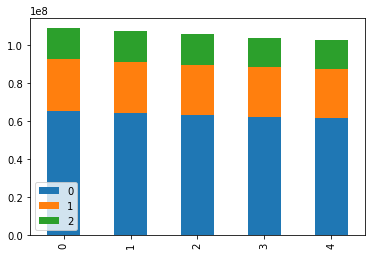

In [107]:
pd.DataFrame(np.reshape(list(area_sum_monthly), (5,3))).plot(kind = 'bar', stacked = True)

In [110]:
area_by_burger = pd.DataFrame(np.reshape(list(area_sum_monthly), (5,3)))
area_by_burger

,0,1,2
0,65362334,27233220,16345942
1,64421707,26815953,16104137
2,63572000,26341429,15821178
3,62328614,26039450,15614539
4,61582375,25724566,15540968


In [111]:
area_by_burger.index = ['NE', 'SW', 'NW', 'SE', 'C']
area_by_burger.columns = ['HM', 'CF', 'FF']
area_by_burger

,HM,CF,FF
NE,65362334,27233220,16345942
SW,64421707,26815953,16104137
NW,63572000,26341429,15821178
SE,62328614,26039450,15614539
C,61582375,25724566,15540968


In [69]:
area_by_burger.to_csv('monthly_area_by_burger.csv')

In [114]:
area_by_burger['CF'].values

array([27233220, 26815953, 26341429, 26039450, 25724566])

In [17]:
dailyHM = [c for c in daily.columns if 'HM' in c]
dailyFF = [c for c in daily.columns if 'FF' in c]
dailyCF = [c for c in daily.columns if 'CF' in c]


In [49]:
daily['HM_total'] = daily[dailyHM].sum(axis = 1)
daily['CF_total'] = daily[dailyCF].sum(axis = 1)
daily['FF_total'] = daily[dailyFF].sum(axis = 1)
daily['total'] = daily['HM_total'] + daily['CF_total'] + daily['FF_total']
daily.head()

,Weekday,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,FF-C,HM_total,CF_total,FF_total,C_total,NE_total,NW_total,SE_total,SW_total,total
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,11232,185416,76915,51540,60420,61763,64014,61656,66018,313871
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,9152,182961,72779,41451,60586,58934,58754,59492,59425,297191
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,8406,178589,77157,40602,59818,60507,60065,55794,60164,296348
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,7940,182018,76289,42141,59807,63540,60562,59330,57209,300448
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,8607,182916,75062,47568,60864,64358,62323,60667,57334,305546


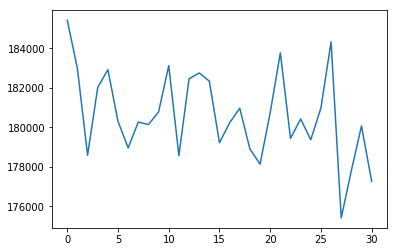

In [27]:
daily['HM_total'].plot()

In [28]:
daily.rename(columns = {'Unnamed: 0': 'Weekday'}, inplace = True)
daily

,Weekday,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C,HM_total,CF_total,FF_total
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,9924,35967,13955,11734,35689,13499,11232,185416,76915,51540
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,9028,36398,15089,8005,37178,14256,9152,182961,72779,41451
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,8105,34864,13919,7011,35855,15557,8406,178589,77157,40602
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940,182018,76289,42141
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,9879,36661,15132,8874,36837,15420,8607,182916,75062,47568
5,Wednesday,1/6/2016,38187,16386,8410,33608,14322,9652,36343,16302,9360,34374,14696,9674,37790,13810,10228,180302,75516,47324
6,Thursday,1/7/2016,38095,16045,11791,33007,15068,8985,35901,15408,8834,35895,14981,8370,36061,13436,8993,178959,74938,46973
7,Friday,1/8/2016,34685,15058,8179,38964,13608,10985,36279,14465,10639,35441,13411,11630,34898,15544,12463,180267,72086,53896
8,Saturday,1/9/2016,35059,14585,7193,33637,14035,7616,38059,13804,8589,36194,15525,6890,37192,13619,6799,180141,71568,37087
9,Sunday,1/10/2016,36906,16905,10580,39361,14788,7105,35332,15809,7702,33847,15282,7520,35334,14447,7583,180780,77231,40490


In [52]:
daily['total'].values

array([313871, 297191, 296348, 300448, 305546, 303142, 300870, 306249,
       288796, 298501, 308626, 298167, 307169, 303818, 311078, 297087,
       296557, 300794, 294743, 297686, 306732, 315942, 294499, 294269,
       302787, 301637, 307841, 303499, 305795, 294094, 297197])

In [115]:
daily.groupby('Weekday')['total'].mean()\
[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].values

array([303163.75, 300023.25, 303959.5 , 303729.75, 310587.  , 294333.4 ,
       296574.4 ])

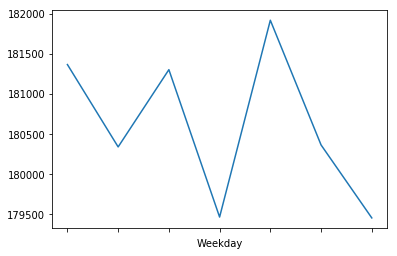

In [117]:
daily.groupby('Weekday')['HM_total'].mean()\
[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

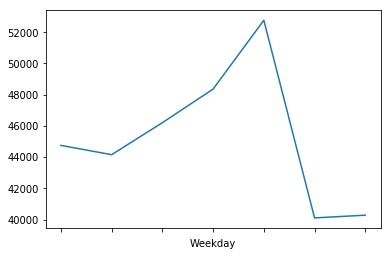

In [31]:
daily.groupby('Weekday')['FF_total'].mean()\
[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

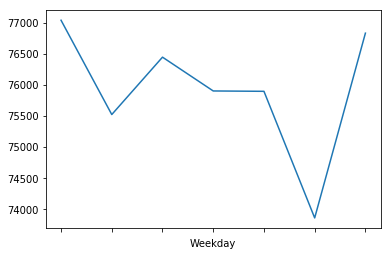

In [32]:
daily.groupby('Weekday')['CF_total'].mean()\
[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

In [75]:
dailyC = [c for c in daily.columns if '-C' in c]
dailyNE = [c for c in daily.columns if '-NE' in c]
dailyNW = [c for c in daily.columns if '-NW' in c]
dailySE = [c for c in daily.columns if '-SE' in c]
dailySW = [c for c in daily.columns if '-SW' in c]

daily['C_total'] = daily[dailyC].sum(axis = 1)
daily['NE_total'] = daily[dailyNE].sum(axis = 1)
daily['NW_total'] = daily[dailyNW].sum(axis = 1)
daily['SE_total'] = daily[dailySE].sum(axis = 1)
daily['SW_total'] = daily[dailySW].sum(axis = 1)



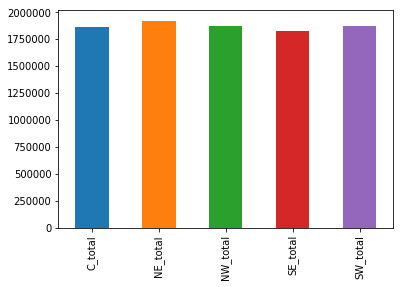

In [76]:
daily[[a+'_total' for a in ['C', 'NE', 'NW', 'SE', 'SW']]].sum().plot(kind = 'bar')

In [77]:
area_sum = daily[[c for c in daily.columns if 'total' not in c][2:]].sum()
area_sum

HM-NE    1140955
CF-NE     494802
FF-NE     285238
HM-SW    1124565
CF-SW     468568
FF-SW     281141
HM-NW    1111618
CF-NW     482079
FF-NW     277904
HM-SE    1095034
CF-SE     456264
FF-SE     273758
HM-C     1126476
CF-C      450958
FF-C      281619
dtype: int64

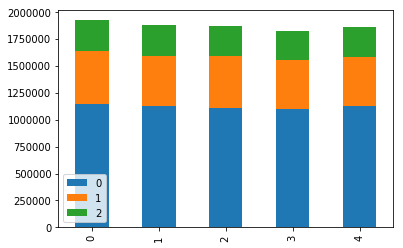

In [78]:
pd.DataFrame(np.reshape(list(area_sum), (5,3))).plot(kind = 'bar', stacked = True)

In [82]:
pd.DataFrame(np.reshape(list(area_sum), (5,3)))[1].values

array([494802, 468568, 482079, 456264, 450958])

In [42]:
sums = pd.DataFrame(np.reshape(list(area_sum), (5,3))).sum(axis = 1)